## Part 2

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import matplotlib

In [6]:
df = pd.read_csv('new_york_data.csv', index_col = 0)

C:\Users\aaron\AppData\Local\Temp\ipykernel_89244\2076588821.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_york_data.csv', index_col = 0)


In [8]:
df.drop(columns = {'_merge'}, inplace = True)

In [10]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9


In [12]:
df.shape

(29838806, 15)

The dates are out of order, and some of the dates are before the 2022 time frame used for this analysis

In [15]:
df = df.sort_values(by = 'date')

In [17]:
df = df[df['date'] >= '2022-01-01']

In [19]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
881771,291C8B1D2F451F20,classic_bike,2022-01-01 01:41:45.865,2022-01-01 02:19:07.819,Central Park West & W 76 St,7253.04,5 Ave & E 78 St,7161.08,40.778968,-73.973747,40.776321,-73.964274,casual,2022-01-01,11.6
225211,EE55558726CC75A7,classic_bike,2022-01-01 03:39:20.314,2022-01-01 03:47:43.294,E 88 St & 1 Ave,7235.13,5 Ave & E 87 St,7323.09,40.778301,-73.948813,40.782323,-73.959875,casual,2022-01-01,11.6
483157,BAE74126E17B6794,electric_bike,2022-01-01 17:33:03.958,2022-01-01 17:43:13.897,Metropolitan Ave & Bedford Ave,5308.04,Montrose Ave & Bushwick Ave,5068.02,40.715348,-73.960241,40.707678,-73.940162,casual,2022-01-01,11.6
75152,F4151B16DDFE3052,classic_bike,2022-01-01 14:31:52.691,2022-01-01 14:54:30.877,W 21 St & 6 Ave,6140.05,West End Ave & W 60 St,7059.08,40.741740,-73.994156,40.772370,-73.990050,member,2022-01-01,11.6
390711,E87EDCD278436C83,classic_bike,2022-01-01 14:52:25.593,2022-01-01 15:12:10.330,5 Ave & E 87 St,7323.09,Frederick Douglass Blvd & W 117 St,7688.12,40.782323,-73.959875,40.805159,-73.954692,member,2022-01-01,11.6


In [21]:
df.shape

(29838166, 15)

In [23]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [25]:
df['date'] = pd.to_datetime(df['date'])

## Part 3

In [29]:
# Set up for line chart
df_temp = df.set_index('date')

In [31]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-01,291C8B1D2F451F20,classic_bike,2022-01-01 01:41:45.865,2022-01-01 02:19:07.819,Central Park West & W 76 St,7253.04,5 Ave & E 78 St,7161.08,40.778968,-73.973747,40.776321,-73.964274,casual,11.6
2022-01-01,EE55558726CC75A7,classic_bike,2022-01-01 03:39:20.314,2022-01-01 03:47:43.294,E 88 St & 1 Ave,7235.13,5 Ave & E 87 St,7323.09,40.778301,-73.948813,40.782323,-73.959875,casual,11.6
2022-01-01,BAE74126E17B6794,electric_bike,2022-01-01 17:33:03.958,2022-01-01 17:43:13.897,Metropolitan Ave & Bedford Ave,5308.04,Montrose Ave & Bushwick Ave,5068.02,40.715348,-73.960241,40.707678,-73.940162,casual,11.6
2022-01-01,F4151B16DDFE3052,classic_bike,2022-01-01 14:31:52.691,2022-01-01 14:54:30.877,W 21 St & 6 Ave,6140.05,West End Ave & W 60 St,7059.08,40.741740,-73.994156,40.772370,-73.990050,member,11.6
2022-01-01,E87EDCD278436C83,classic_bike,2022-01-01 14:52:25.593,2022-01-01 15:12:10.330,5 Ave & E 87 St,7323.09,Frederick Douglass Blvd & W 117 St,7688.12,40.782323,-73.959875,40.805159,-73.954692,member,11.6


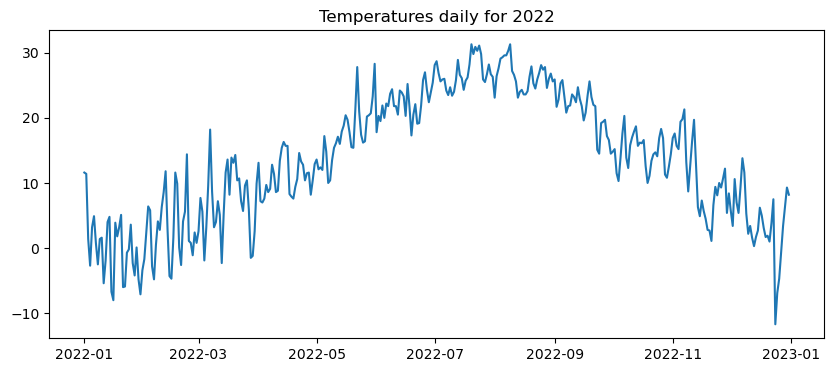

In [33]:
# Making the line chart
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_temp['avgTemp'])
plt.show()

## Part 4

In [39]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [42]:
df_group.head()

,date,ride_id
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230


In [50]:
# Adding new column

df_group.rename(columns = {'ride_id':'daily_bike_rides'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

_merge
both          29838166
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20428, 17)
Shape of January 2nd is (43009, 17)


In [53]:
df.drop(columns = {'_merge'}, inplace = True)

In [55]:
df_temp.drop(columns = {'_merge'}, inplace = True)

In [60]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_bike_rides
date,,,,,,,,,,,,,,,
2022-01-01,291C8B1D2F451F20,classic_bike,2022-01-01 01:41:45.865,2022-01-01 02:19:07.819,Central Park West & W 76 St,7253.04,5 Ave & E 78 St,7161.08,40.778968,-73.973747,40.776321,-73.964274,casual,11.6,20428
2022-01-01,EE55558726CC75A7,classic_bike,2022-01-01 03:39:20.314,2022-01-01 03:47:43.294,E 88 St & 1 Ave,7235.13,5 Ave & E 87 St,7323.09,40.778301,-73.948813,40.782323,-73.959875,casual,11.6,20428
2022-01-01,BAE74126E17B6794,electric_bike,2022-01-01 17:33:03.958,2022-01-01 17:43:13.897,Metropolitan Ave & Bedford Ave,5308.04,Montrose Ave & Bushwick Ave,5068.02,40.715348,-73.960241,40.707678,-73.940162,casual,11.6,20428
2022-01-01,F4151B16DDFE3052,classic_bike,2022-01-01 14:31:52.691,2022-01-01 14:54:30.877,W 21 St & 6 Ave,6140.05,West End Ave & W 60 St,7059.08,40.741740,-73.994156,40.772370,-73.990050,member,11.6,20428
2022-01-01,E87EDCD278436C83,classic_bike,2022-01-01 14:52:25.593,2022-01-01 15:12:10.330,5 Ave & E 87 St,7323.09,Frederick Douglass Blvd & W 117 St,7688.12,40.782323,-73.959875,40.805159,-73.954692,member,11.6,20428


## Part 5

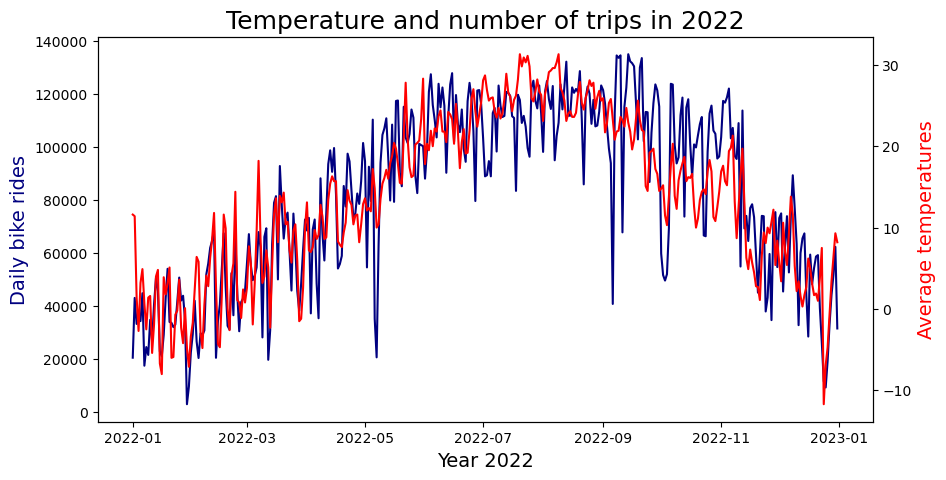

In [66]:
# Creating dual axis graph

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['daily_bike_rides'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Daily bike rides",color = "navy", fontsize = 14) # set y-axis label

# Enabling dual axis
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and number of trips in 2022', fontsize = 18)
plt.show()

In [69]:
plt.style.use('ggplot')

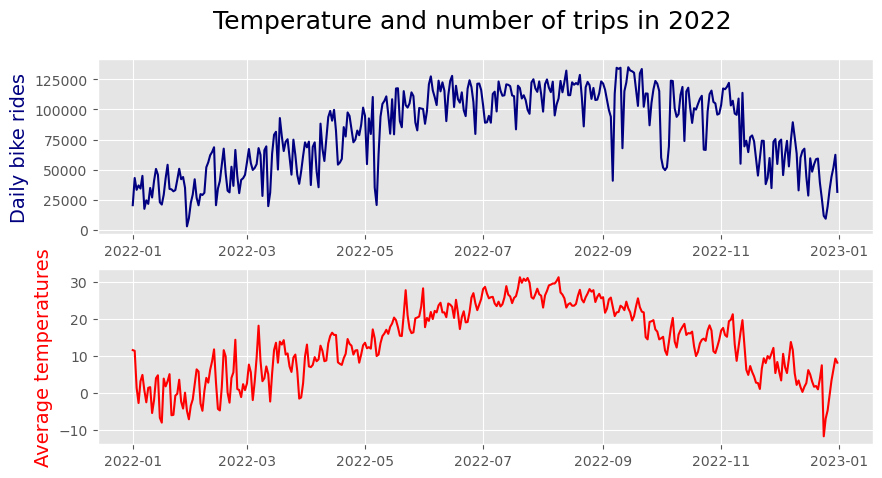

In [74]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(10, 5))

# Make a plot of the bike rides
ax[0].plot(df_temp['daily_bike_rides'],color = "navy")
ax[0].set_ylabel("Daily bike rides",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and number of trips in 2022', fontsize = 18)

plt.show()

## Part 6

To make the dual axis graph that you see a the beginning of part 5 I first defined the full figure with the first line of code. After that I defined the first line chart with the first y-axis like normal, but then with 'ax2 = ax.twinx()' I made a second y-axis that I atached the second line chart to.